In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('Datasets/train.csv', encoding='utf8')
test_df = pd.read_csv('Datasets/test.csv', encoding='utf8')

In [3]:
train_df.head(5)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
train_df.shape

(3116945, 22)

In [6]:
train_df.dtypes

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [7]:
# Check whether there are duplicated data in dataset
train_df.duplicated().sum()

0

In [8]:
# Check whether there is missing value in dataset
train_df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [9]:
test_df.shape

(2077964, 21)

In [10]:
test_df.dtypes

id                        int64
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [11]:
test_df.duplicated().sum()

0

In [12]:
test_df.isna().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

In [13]:
# Create copies of the original training/testing data
train_df_cleaned = train_df.copy()
test_df_cleaned = test_df.copy()

In [14]:
# Drop 'id' column in training dataset
train_df_cleaned = train_df_cleaned.drop('id', axis=1)

In [15]:
# Define the prediction target
target_column = 'class'

In [16]:
# Obtain categorical features / columns while excluding the prediction target
categorical_features = train_df_cleaned.select_dtypes(include=['object']).columns
print(categorical_features)
print("-" * 50)
categorical_features = categorical_features.drop(target_column)
print(categorical_features)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color',
       'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')
--------------------------------------------------
Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')


In [17]:
# Obtain numerical features / columns while excluding the prediction target
numerical_features = train_df_cleaned.select_dtypes(exclude=['object']).columns
print(numerical_features)
print("-" * 50)
numerical_features = numerical_features.drop(target_column)
print(numerical_features)

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')
--------------------------------------------------


KeyError: "['class'] not found in axis"

In [20]:
# Finding number of categories of categorical features
for column in categorical_features:
    num_unique = len(train_df_cleaned[column].unique())
    print(f"{column} {num_unique}")

cap-shape 75
cap-surface 84
cap-color 79
does-bruise-or-bleed 27
gill-attachment 79
gill-spacing 49
gill-color 64
stem-root 39
stem-surface 61
stem-color 60
veil-type 23
veil-color 25
has-ring 24
ring-type 41
spore-print-color 33
habitat 53
season 4


In [23]:
# Print unique value counts for each categorical features
for column in categorical_features:
    print(train_df_cleaned[column].value_counts().head(10))
    print("-"*50)

cap-shape
x    1436026
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
d         65
e         60
n         41
Name: count, dtype: int64
--------------------------------------------------
cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
Name: count, dtype: int64
--------------------------------------------------
cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
o     178847
p      91838
r      78236
u      73172
b      61313
Name: count, dtype: int64
--------------------------------------------------
does-bruise-or-bleed
f    2569743
t     547085
w         14
c         11
h          9
a          7
b          7
x          7
y          7
k          6
Name: count, dtype: int64
--------------------------------------------------
gill-attachment
a    646034
d    589236
x    360878
e    301858
s    295439
p    279110
f    119953
c        74
u        56
w    

In [24]:
# Identify Replace infrequent categories
# Threshold can be changed
def replace_infrequent_categories(df, column, threshold=70):
    value_counts = df[column].value_counts()
    infrequent = value_counts[value_counts <= threshold].index
    df[column] = df[column].apply(lambda x: "Unknown" if x in infrequent else x)
    return df

In [25]:
# Handle invalid values and infrequent categories for all categorical columns
for col in categorical_features:
    train_df_cleaned = replace_infrequent_categories(train_df_cleaned, col)
    test_df_cleaned = replace_infrequent_categories(test_df_cleaned, col)

# Print out number of unique columns after a replacement
print("After a replacement:")
for column in categorical_features:
    num_unique = train_df_cleaned[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

After a replacement:
'cap-shape' has 8 unique categories.
'cap-surface' has 14 unique categories.
'cap-color' has 13 unique categories.
'does-bruise-or-bleed' has 3 unique categories.
'gill-attachment' has 9 unique categories.
'gill-spacing' has 4 unique categories.
'gill-color' has 13 unique categories.
'stem-root' has 6 unique categories.
'stem-surface' has 9 unique categories.
'stem-color' has 14 unique categories.
'veil-type' has 2 unique categories.
'veil-color' has 7 unique categories.
'has-ring' has 3 unique categories.
'ring-type' has 10 unique categories.
'spore-print-color' has 8 unique categories.
'habitat' has 9 unique categories.
'season' has 4 unique categories.


In [26]:
# Filling missing values in numerical features
# Check out the skewess of numbers in each column
print(train_df_cleaned[numerical_features].skew())

cap-diameter    3.972609
stem-height     1.926682
stem-width      1.235427
dtype: float64


In [27]:
# Numbers are very unevenly spread out (skewed), use median to fill in any missing / na values.
# Numbers are more evenly spread out, use mean to fill in any missing / na values

# Compute medians for numerical columns in the training set
medians = train_df_cleaned[numerical_features].median()

# Fill missing values in the training and testing datasets
train_df_cleaned[numerical_features] = train_df_cleaned[numerical_features].fillna(medians)
test_df_cleaned[numerical_features] = test_df_cleaned[numerical_features].fillna(medians)

In [28]:
# Impute categorical missing values with Unknown
train_df_cleaned = train_df_cleaned.fillna("Unknown")
test_df_cleaned = test_df_cleaned.fillna("Unknown")

In [29]:
# Drop any duplicated rows that might have occured.
# Check whether duplicated
print(train_df_cleaned.duplicated().sum())

2


In [30]:
# Clean duplicated element
train_df_cleaned = train_df_cleaned.drop_duplicates()

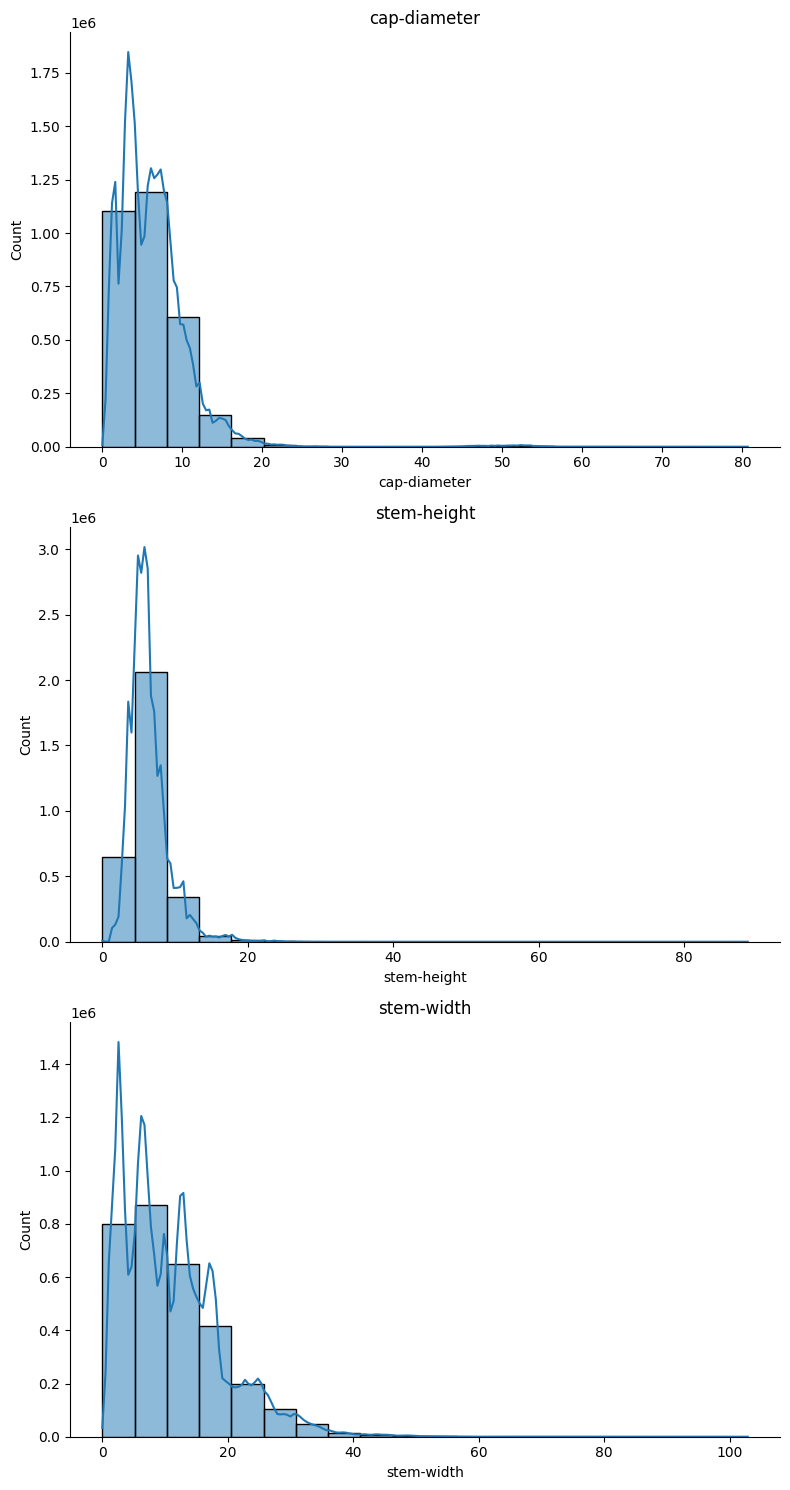

In [33]:
# Distribution of Numerical features
plt.figure(figsize=(8, 15))
for i, column in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=train_df_cleaned, x=column, kde=True, bins=20)
    plt.title(column)
    sns.despine()
plt.tight_layout()
plt.show()

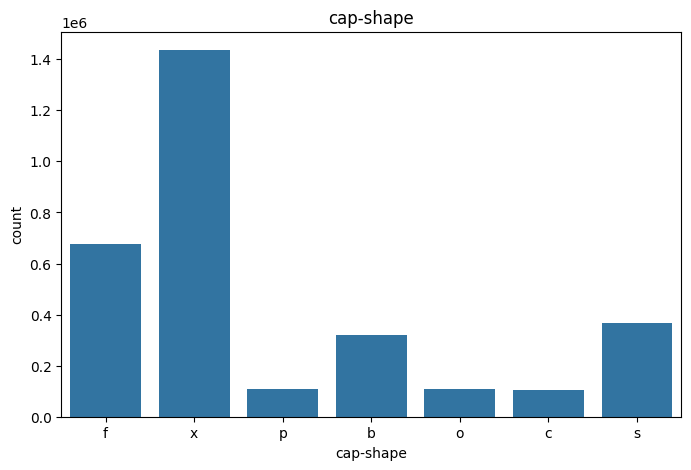

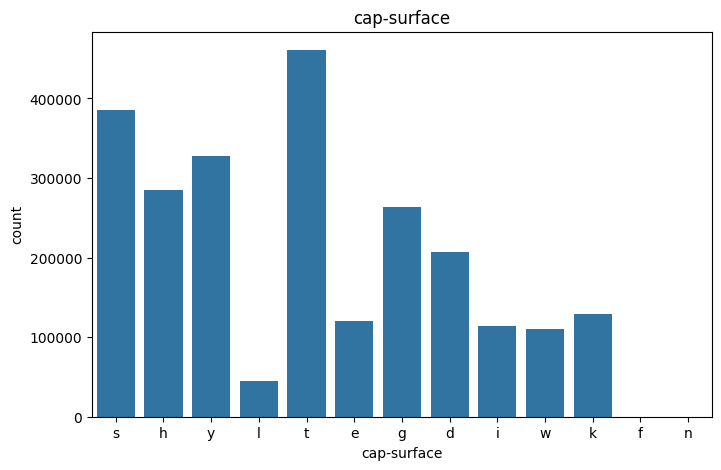

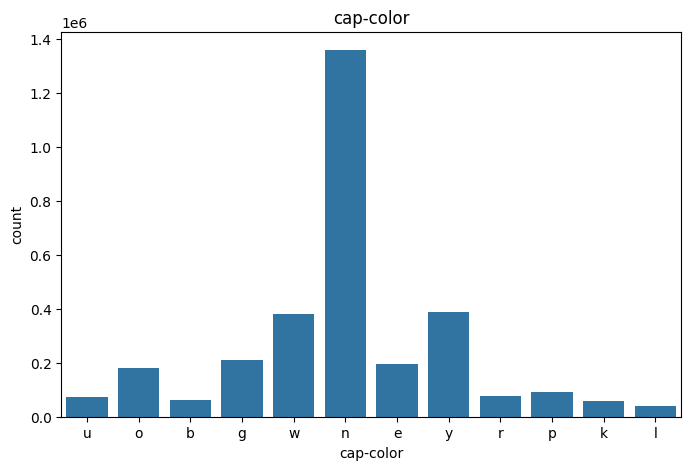

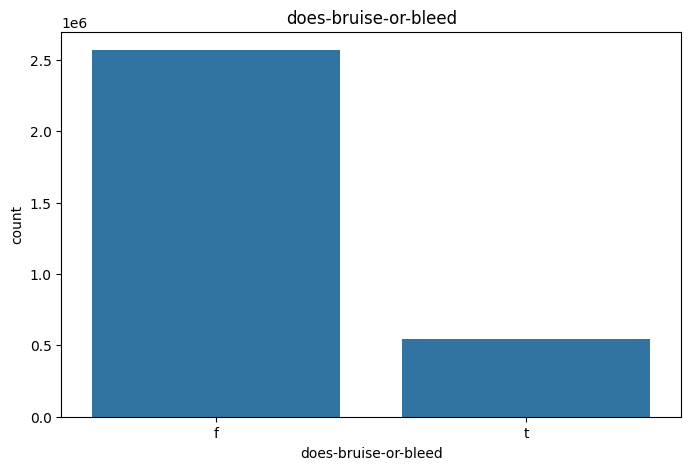

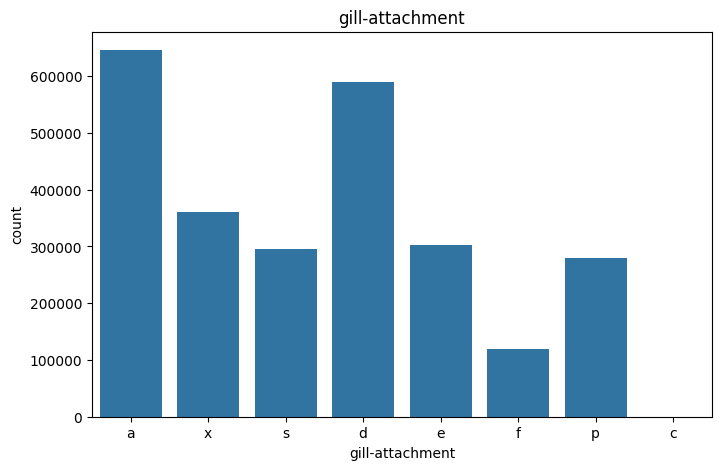

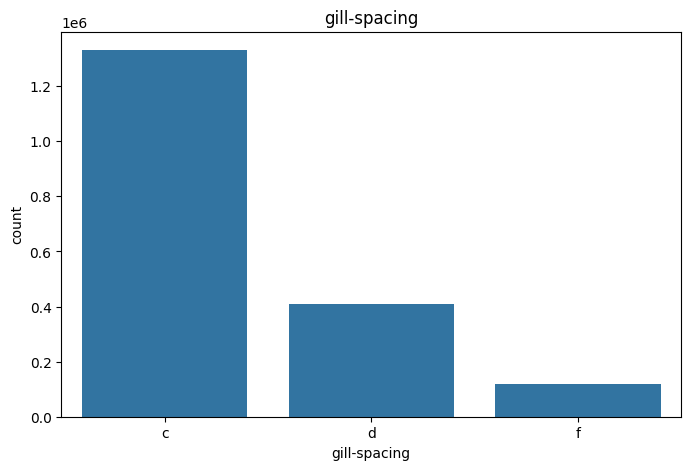

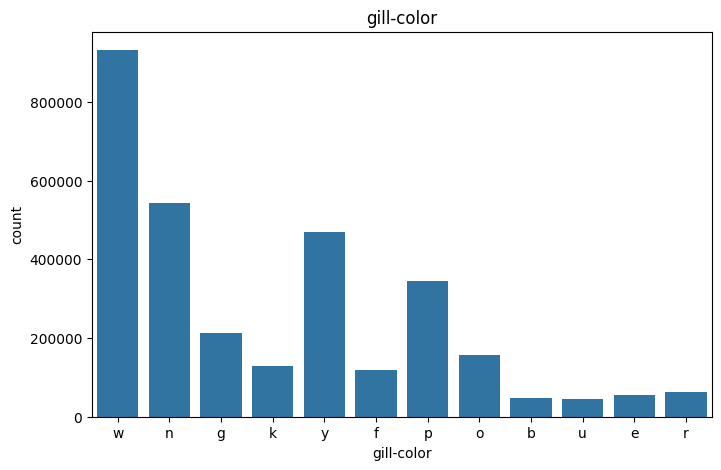

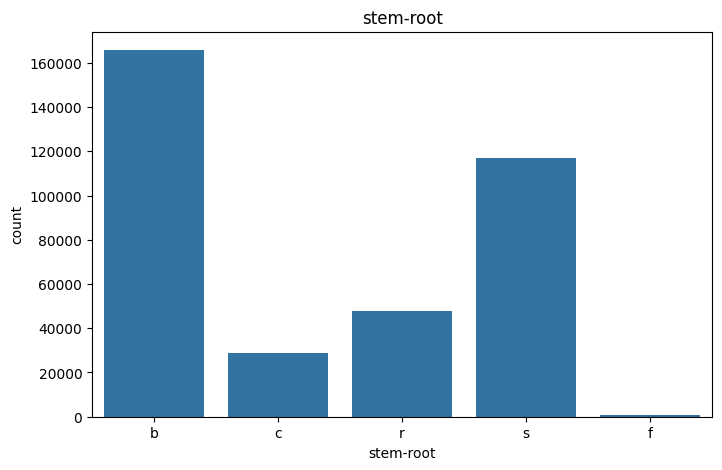

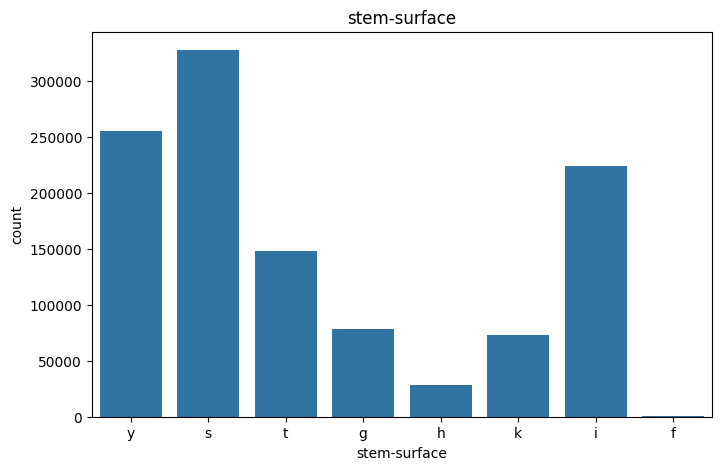

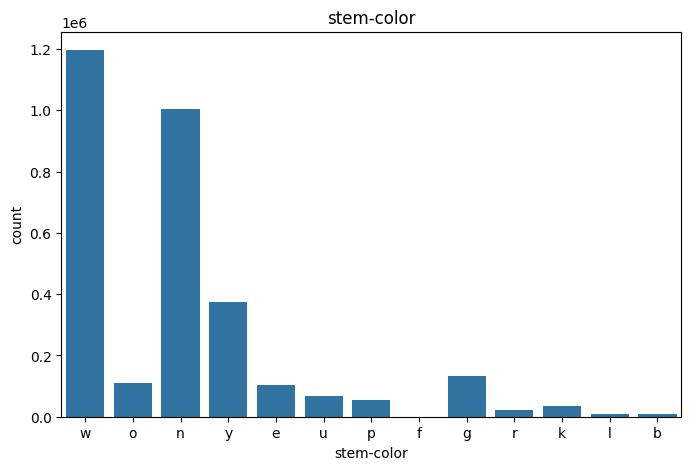

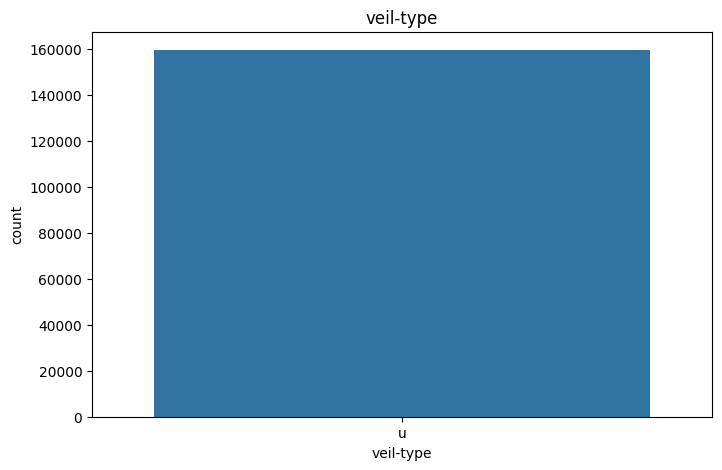

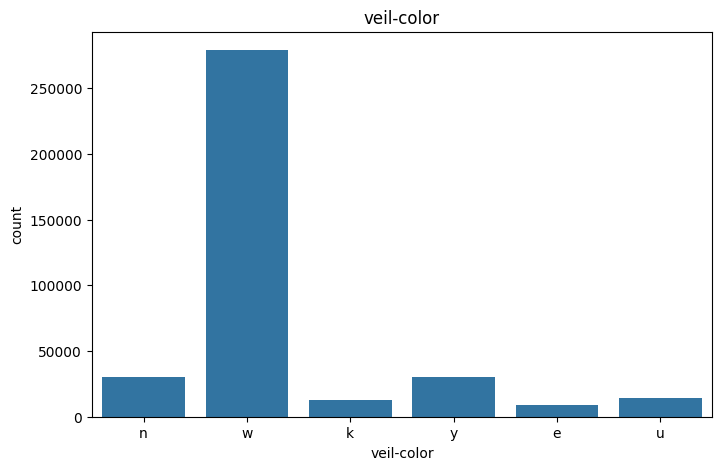

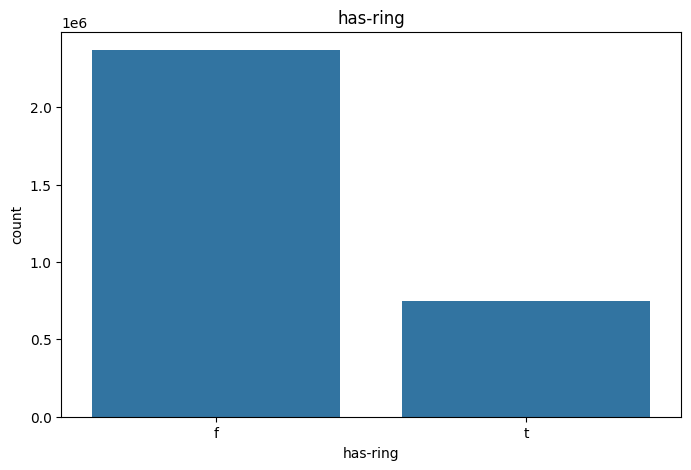

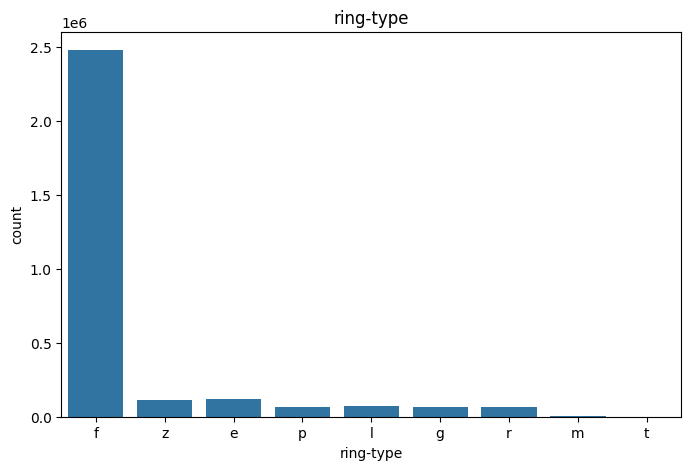

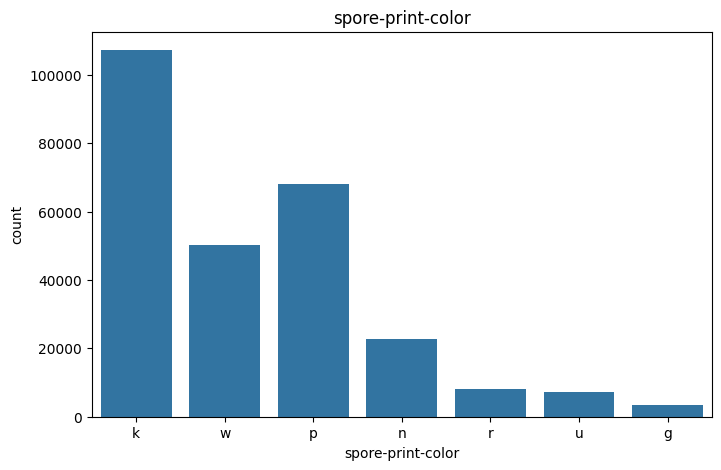

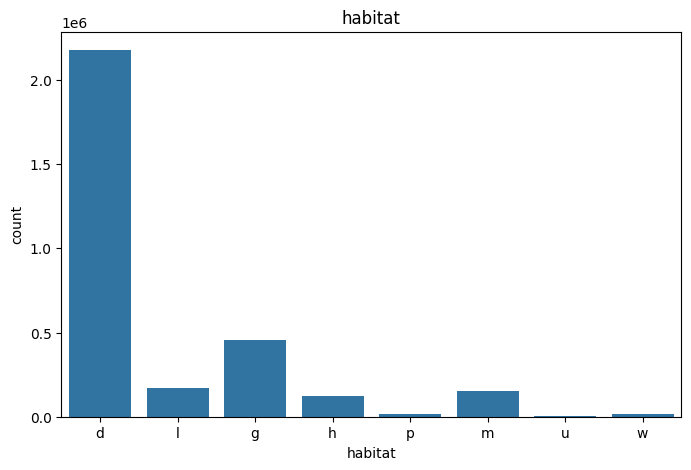

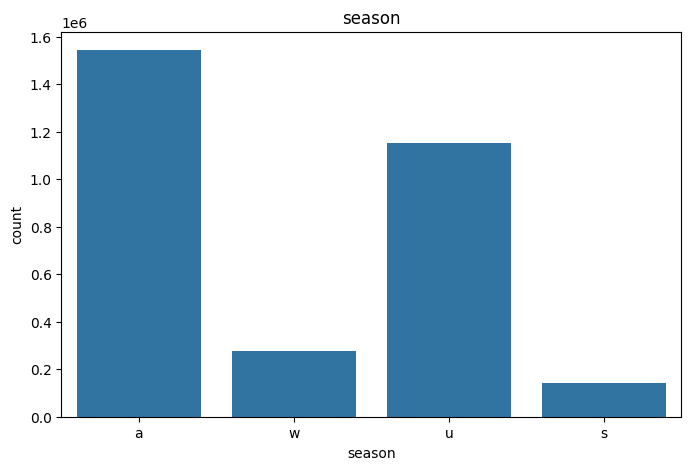

In [34]:
# Distribution of categorical features
for column in categorical_features:
    # Exclude "Unknown" from dataframe
    filtered_data = train_df_cleaned[train_df_cleaned[column] != 'Unknown']
    plt.figure(figsize=(8,5))
    sns.countplot(data=filtered_data, x=column)
    plt.title(column)
    plt.tight_layout
    plt.show()

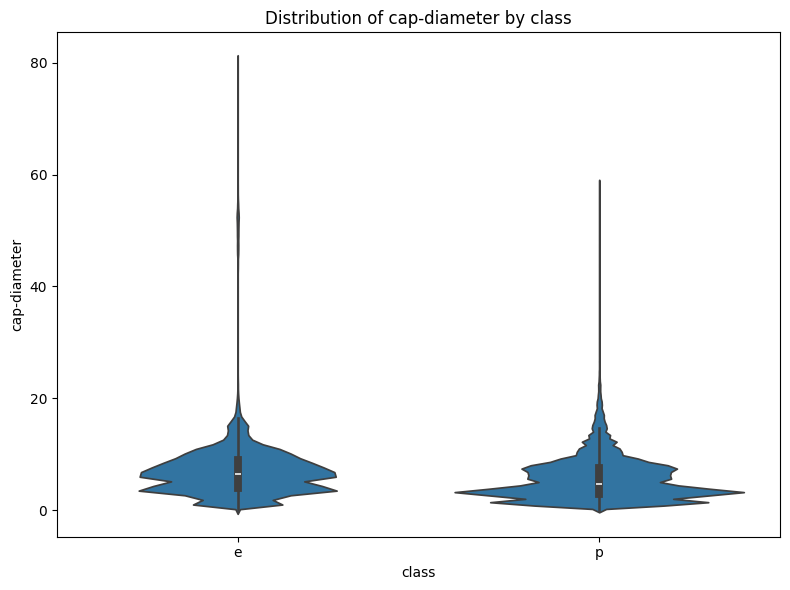

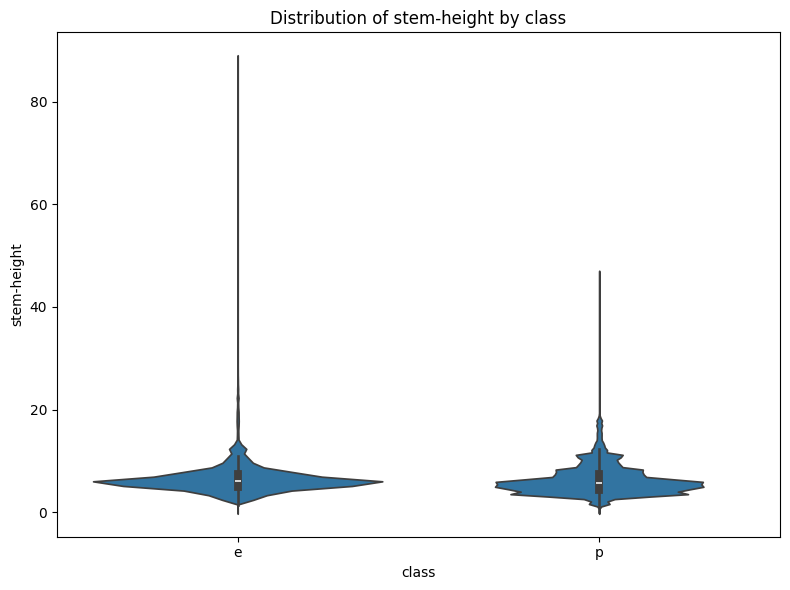

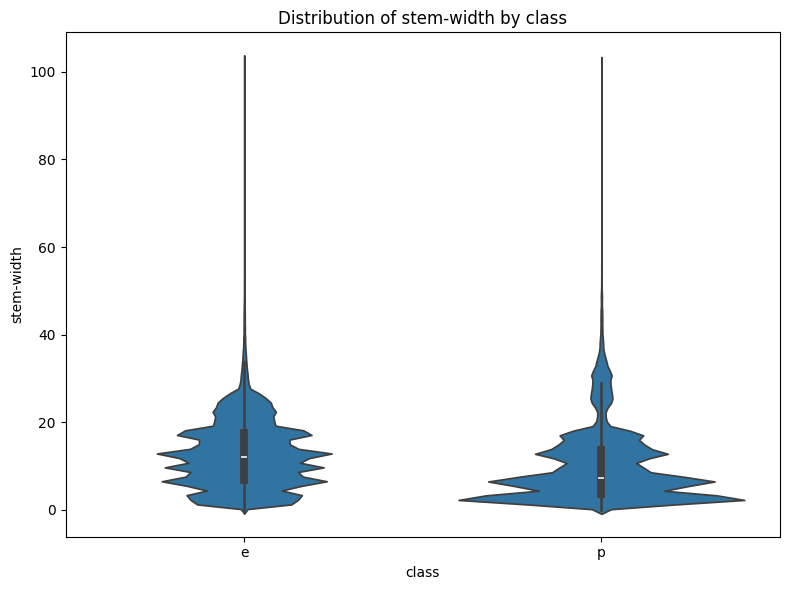

In [36]:
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=train_df_cleaned, x='class', y=column)
    plt.title(f'Distribution of {column} by class')

    plt.tight_layout()
    plt.show()

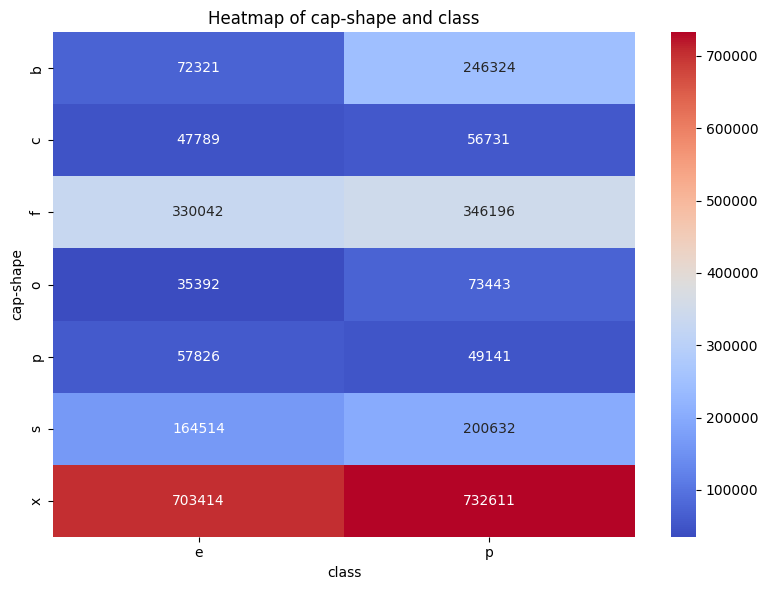

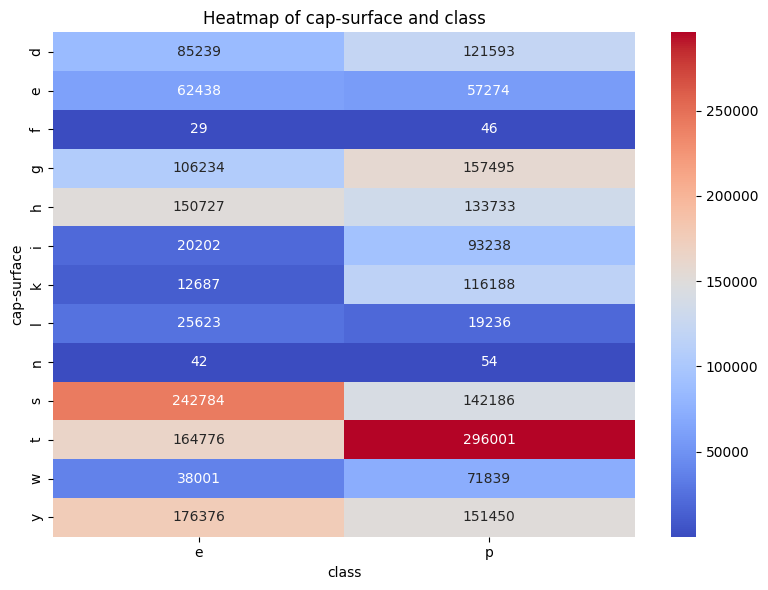

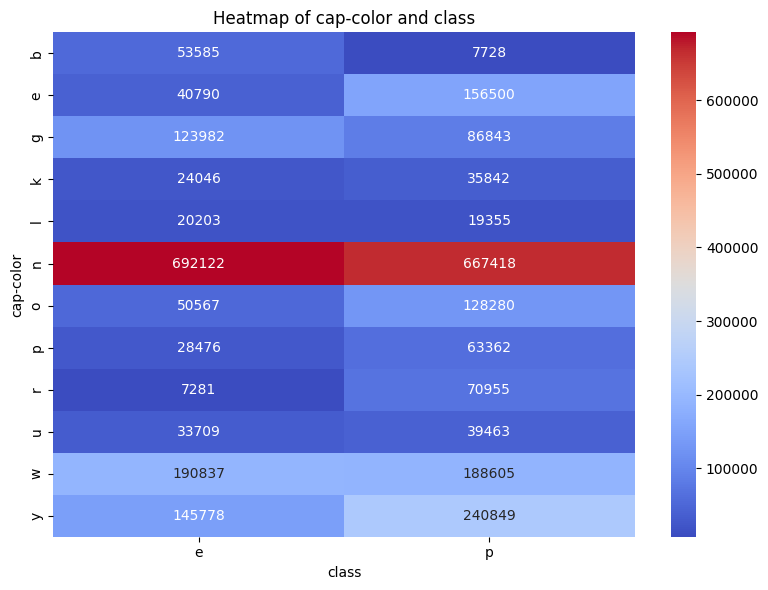

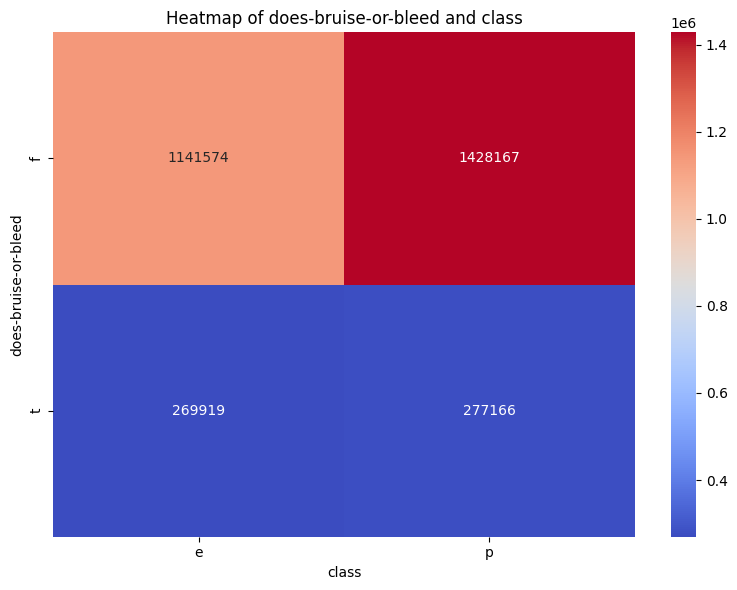

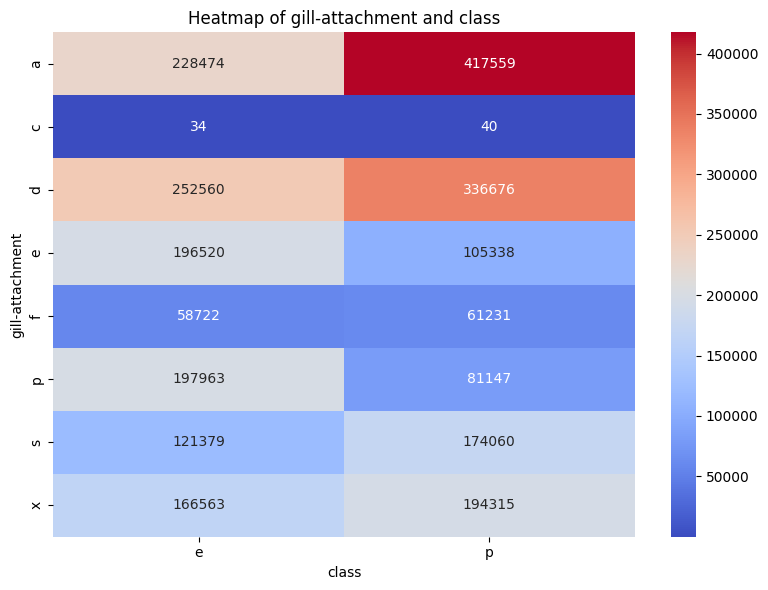

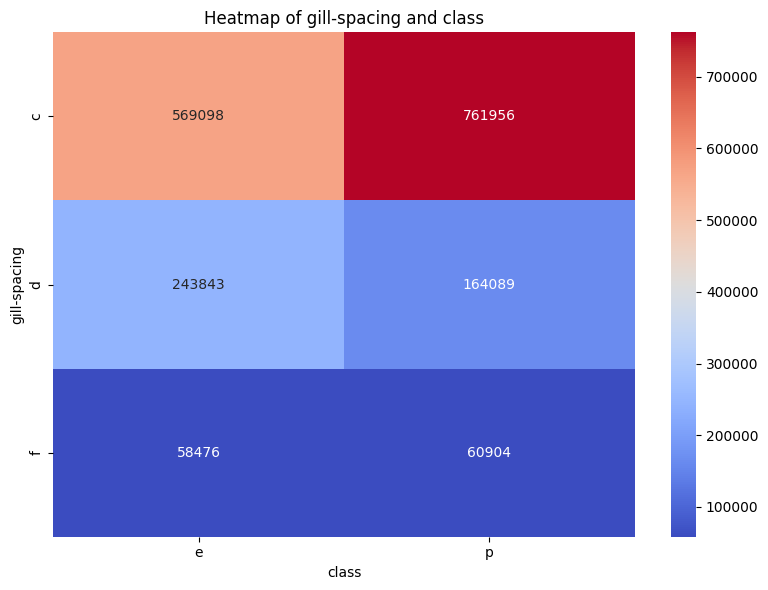

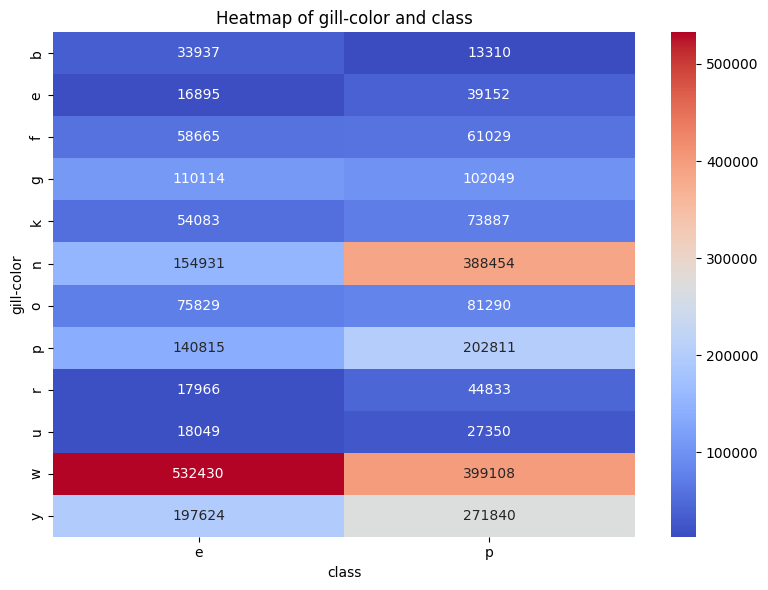

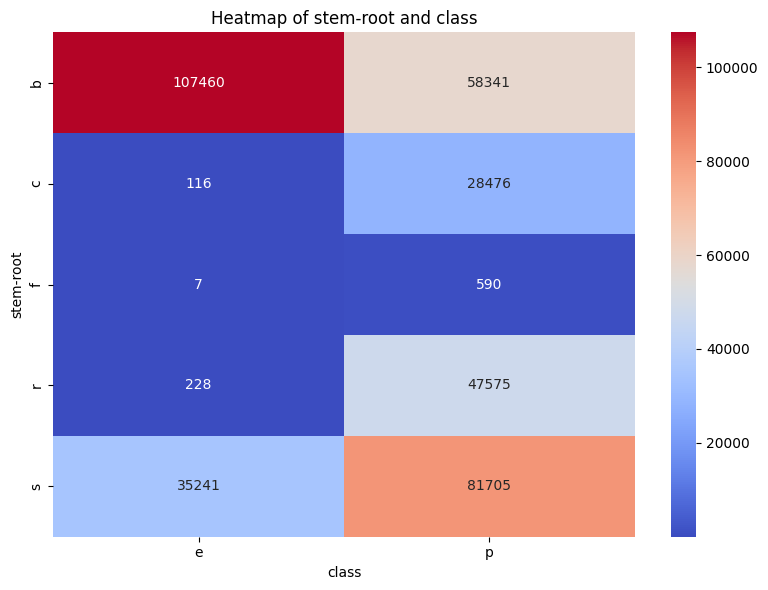

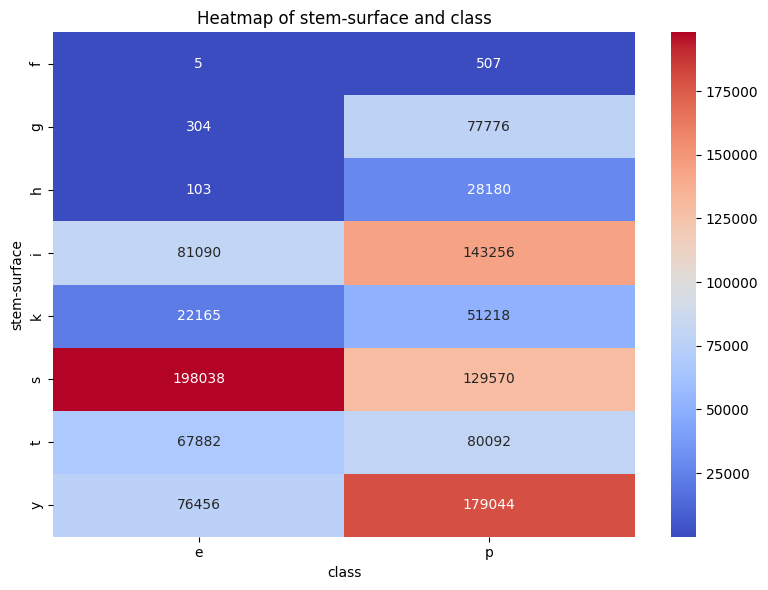

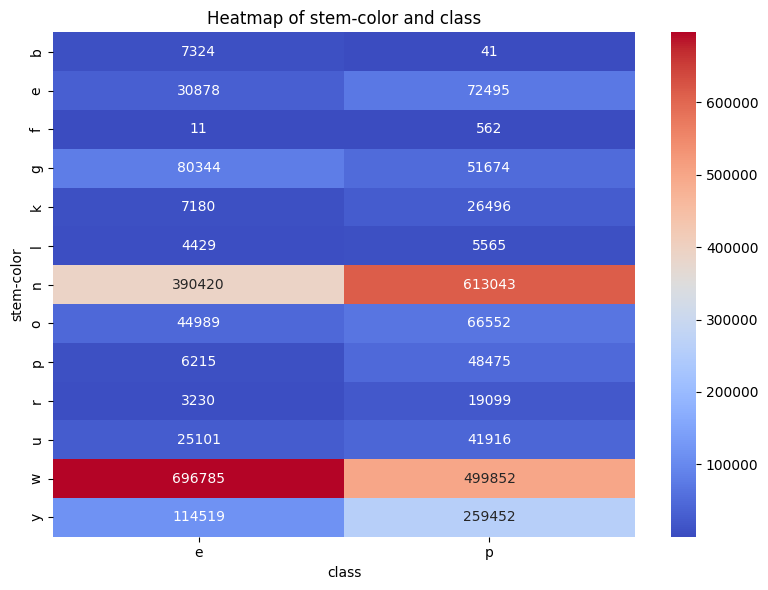

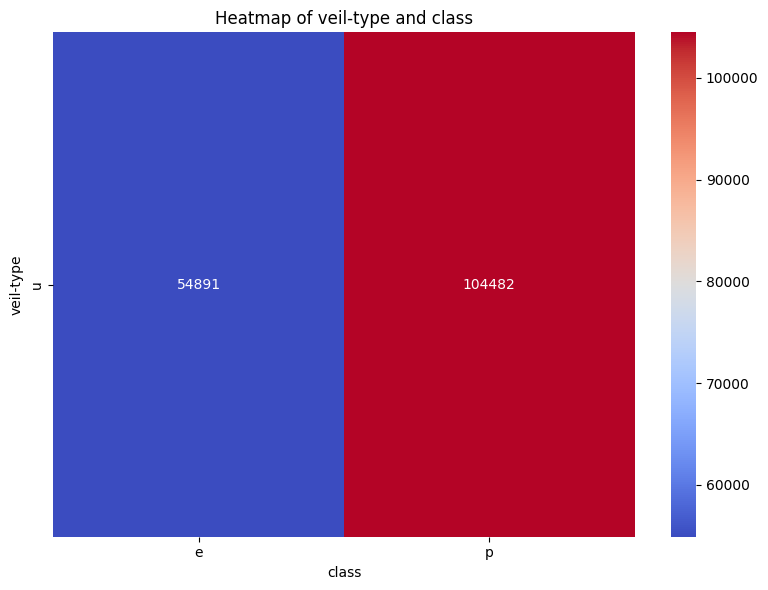

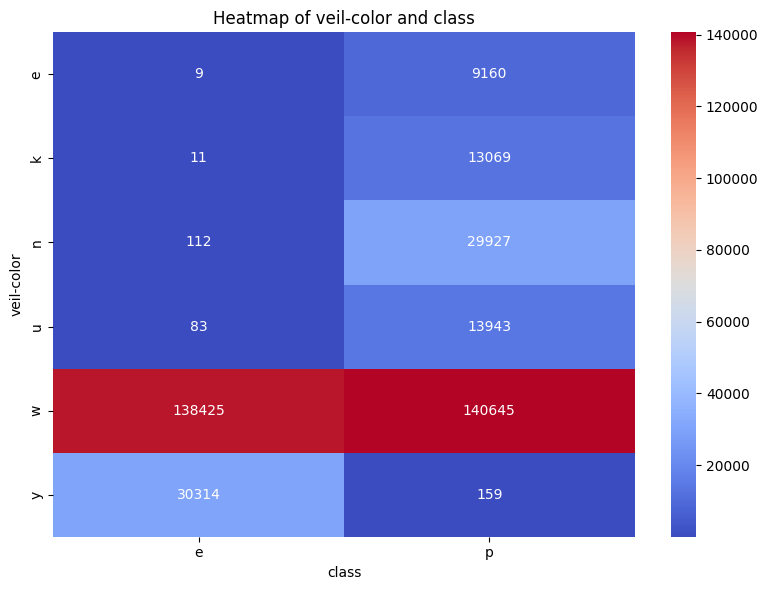

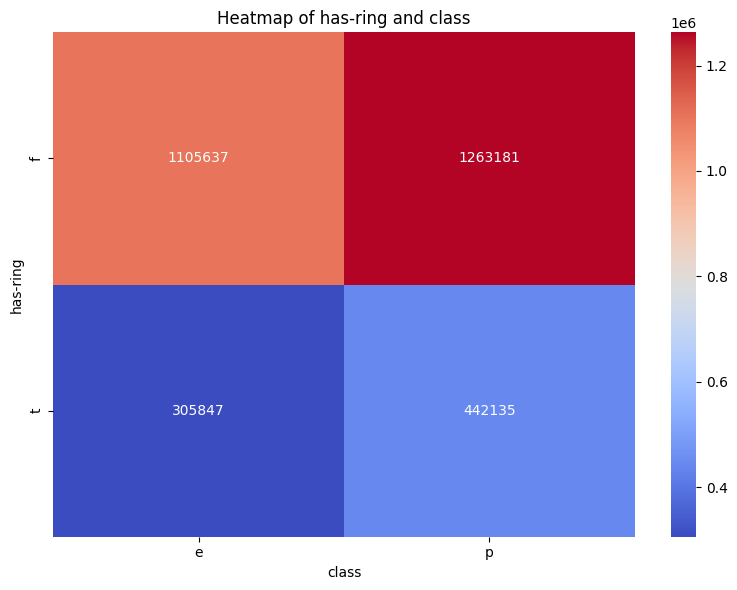

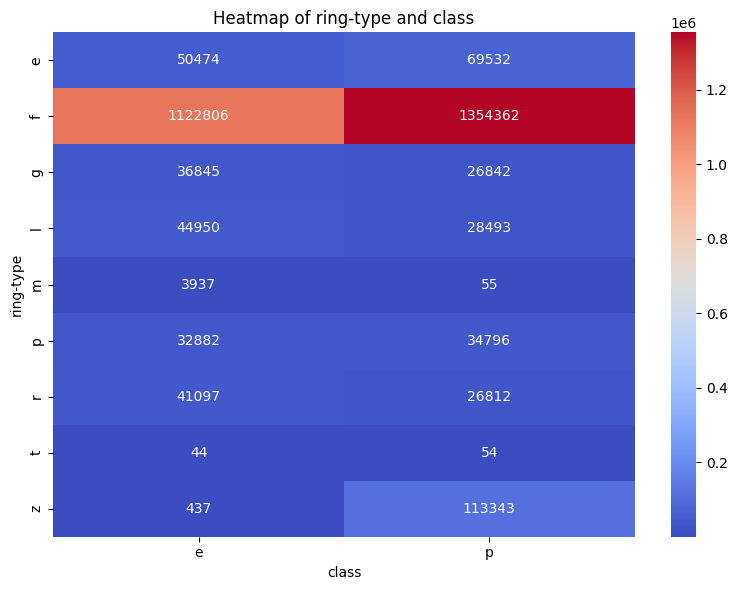

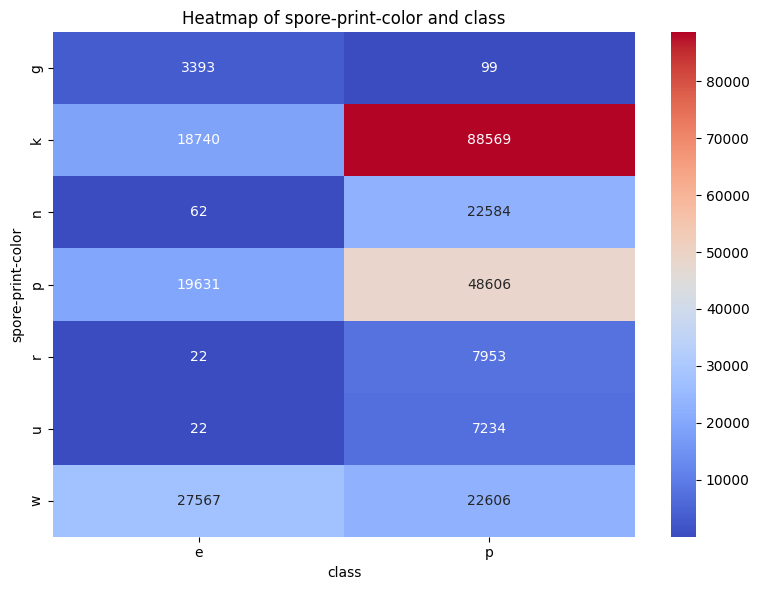

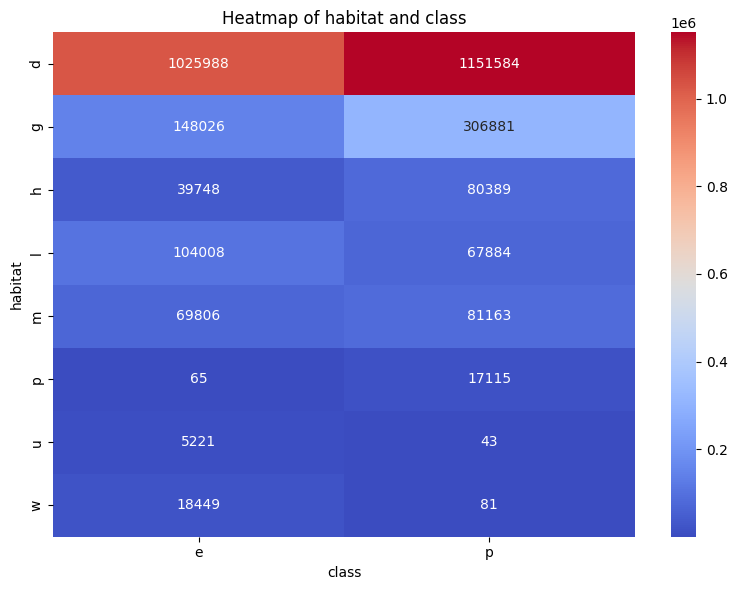

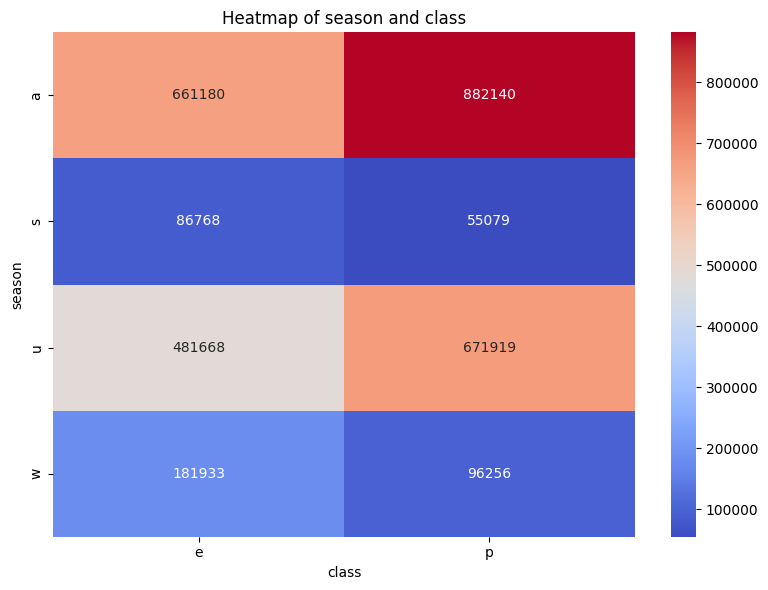

In [37]:
# Plot mosaic plots for each categorical column, excluding "Unknown" values
for column in categorical_features:
    # Exclude "Unknown" values from the DataFrame
    filtered_data = train_df_cleaned.loc[train_df_cleaned[column] != 'Unknown']

    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_data.groupby([column, 'class']).size().unstack(), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Heatmap of {column} and class')
    #mosaic(filtered_data, [column, 'class'])
    #plt.title(f'Mosaic Plot of {column} and class')

    plt.tight_layout()
    plt.show()

In [ ]:
# Finding outliers
# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(df_train_cleaned[numerical_columns])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)



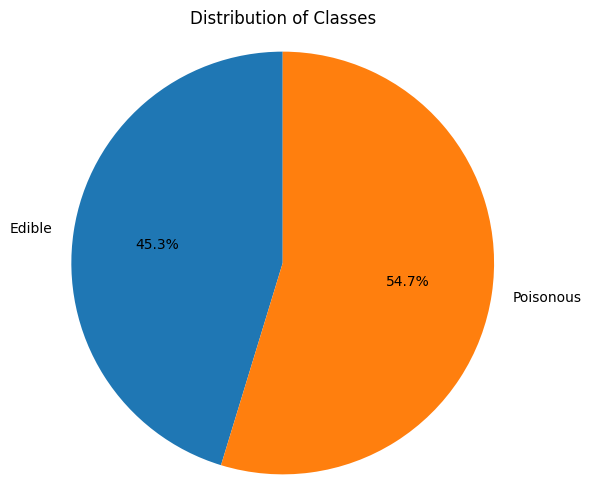

In [38]:
# Calculate counts for the pie chart and add labels
class_counts = train_df_cleaned['class'].value_counts().sort_index()
labels = ["Edible", "Poisonous"]

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import IsolationForest

In [40]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
train_encoded_target = label_encoder.fit_transform(train_df_cleaned[['class']])

# Convert categorical columns to 'category' dtype
train_df_cleaned[categorical_features] = train_df_cleaned[categorical_features].astype('category')
test_df_cleaned[categorical_features] = test_df_cleaned[categorical_features].astype('category')

# Define the numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
])

# Define the categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(dtype=np.int32, handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine both numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Apply the transformations using the pipeline
train_df_preprocessed = preprocessor.fit_transform(train_df_cleaned)
test_df_preprocessed = preprocessor.transform(test_df_cleaned)

In [42]:
# Apply Isolation Forest for outlier detection
rs = 101
isolation_forest = IsolationForest(contamination=0.02, random_state=rs)
outlier_labels = isolation_forest.fit_predict(train_df_preprocessed)

# Filter out outliers
non_outliers_mask = outlier_labels != -1
train_df_preprocessed = train_df_preprocessed[non_outliers_mask]
train_encoded_target = train_encoded_target[non_outliers_mask]

In [43]:
# Separate features (X) and target variable (y)
X = train_df_preprocessed
y = train_encoded_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [ ]:
## Tuning Hyperparameters

# Define the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 5, 7, 14],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.9],
    'colsample_bytree': [0.4, 0.6, 0.8]
}

# Define a custom scoring function for MCC
def mcc_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return matthews_corrcoef(y, y_pred)

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring=mcc_scorer,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:\n", grid_search.best_params_)
print("Best MCC Score:\n", grid_search.best_score_)

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
print("Test MCC Score:", matthews_corrcoef(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
